# Introduction to data science

In [ ]:
import copy

import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

In [ ]:
dataset = load_wine(as_frame=True)
data, target = dataset['data'], dataset['target']
data = data[target != 2]
target = target[target != 2]

dataset = pd.concat((data, target), axis=1)
data_visual = copy.deepcopy(dataset)
data = data.to_numpy()
target = target.to_numpy()

## Data Acquisition

In this tutorial, we will work with a dataset designed for a classification problem. Each sample in the dataset represents a wine and includes 13 features that describe its chemical properties. In addition to these features, each wine sample is labeled with its producer, indicating which of the two wine producers it comes from.


In total, the dataset contains 130 wine samples from two different producers. Structurally, this results in a data table with 130 rows (samples) and 14 columns — 13 columns for the features and 1 column for the class label (the producer).

This dataset gives us a simple and practical example to start exploring key steps in a typical data science workflow.

In [5]:
data_visual

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


The goal of this tutorial is then to develop a sistem that can automatically identify and distinguish the wines from the two producers.

## **Exploratory Data Analysis**

### **Data Visualization**


Data visualization is a crucial step in any data science workflow. Before diving into statistical analysis or building complex models, it's essential to explore and understand the data visually.

So why do we do data visualization?

- Raw data can be overwhelming and difficult to interpret. Visualization transforms the rows and columns of the dataset into intuitive pictures, helping us to quicly grasp some patterns, trends, and relationships that are present in the data;
- By visualizing data, you can form hypotheses, decide which features are important, and choose appropriate modeling techniques;
- Visualization makes it easier to explain findings to others. A well-designed plot can often say more than a table of numbers.

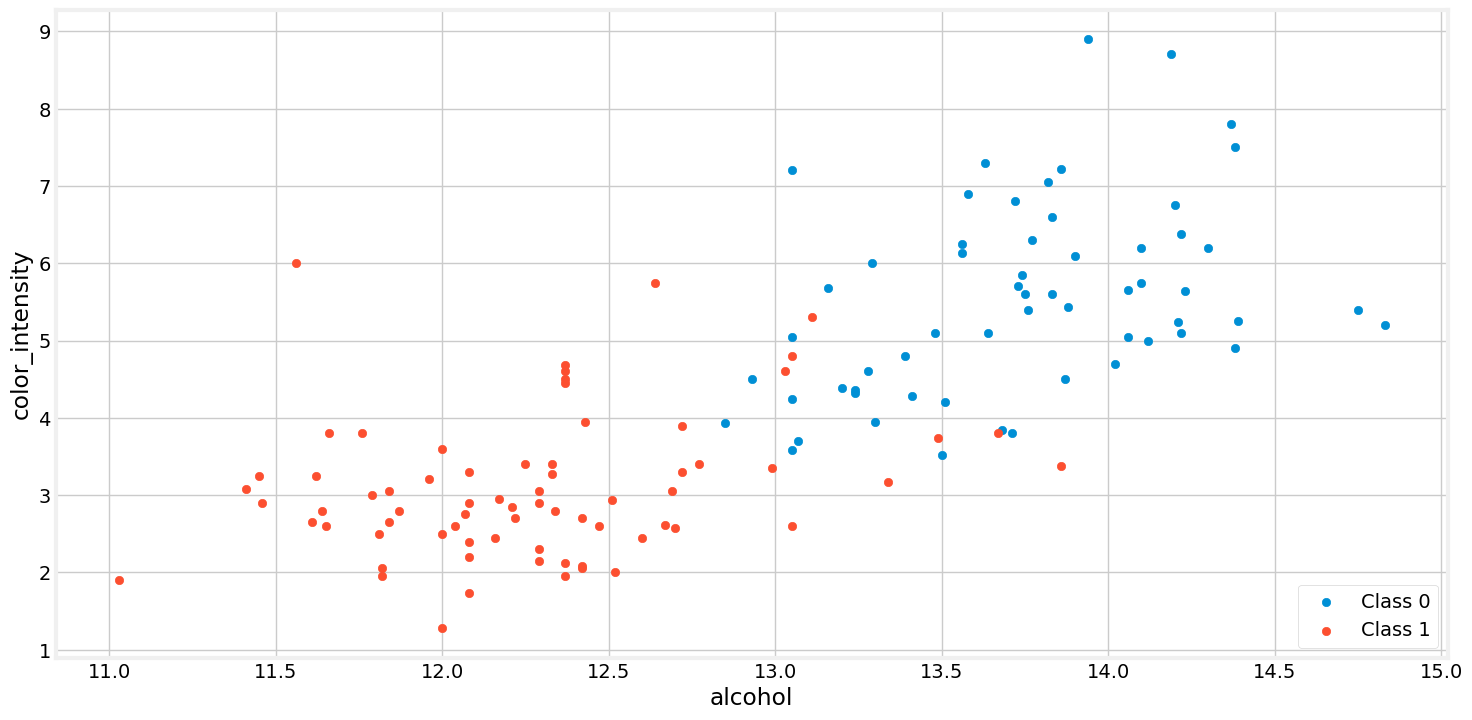

In [6]:
var_name_1 = 'alcohol'
var_name_2 = 'color_intensity'

caracteristica_1 = data_visual[var_name_1].to_numpy()
caracteristica_2 = data_visual[var_name_2].to_numpy()
targets = data_visual['target'].to_numpy()

plt.scatter(caracteristica_1[targets == 0], caracteristica_2[targets == 0], label="Class 0")
plt.scatter(caracteristica_1[targets == 1], caracteristica_2[targets == 1], label="Class 1")
plt.xlabel(f'{var_name_1}')
plt.ylabel(f'{var_name_2}')
plt.legend(loc="lower right")

## Data Pre-processing: Handling Missing Values

Before analyzing or modeling any dataset, it's important to inspect and clean the data. This stage, known as data pre-processing, ensures that the data is in a good shape for downstream tasks like visualization, statistical analysis, and machine learning.

Even though our wine dataset is complete, it's still important to understand how to handle missing data, because it's a common situation in data science.

**Example:**

Suppose that the previous dataset is not complete, and for some reason (e.g., a bad sensor) it was not possible to measure the feature ***alcohol*** for some wine samples.

In [7]:
# Where we randomly remove some values from the dataset to create a new dataset that reflects the problem of missing data
random_idx = [0, 2, 4, 125, 126, 128]
missing_dataset = copy.deepcopy(data_visual)
missing_dataset.loc[random_idx, 'alcohol'] = -1
missing_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,-1.00,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,-1.00,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,-1.00,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-1.00,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,-1.00,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,-1.00,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


We will now showcase two simples approaches that can be used to deal with this missing values.

#### **Using the mean**

A simple and commonly used approach when handling missing data is to replace the missing value with the **mean of that feature**.

If we are dealing with a **classification problem**, like in this case, a better strategy can be to compute the **mean of the feature within the same class** (i.e., same wine producer) and use that value instead.

This helps preserve differences between classes and can lead to better model performance.

In [8]:
# Select only the samples related to each target class
targets = missing_dataset['target']
alcohol_data = missing_dataset['alcohol']

alcohol_data_class_0 = alcohol_data[targets == 0]
alcohol_data_class_1 = alcohol_data[targets == 1]

The goal now is to calculate the mean of the feature for each target class.

**Target 0**

In [9]:
missing_data_idx = np.where(alcohol_data_class_0 == -1)[0]
complete_data_class_0 = alcohol_data_class_0[alcohol_data_class_0 != -1]
mean_of_class_0 = round(complete_data_class_0.mean(), 2)
alcohol_data_class_0[missing_data_idx] = mean_of_class_0
mean_of_class_0

np.float64(13.76)

**Targe 1**

In [10]:
missing_data_idx = np.where(alcohol_data_class_1 == -1)[0]
complete_data_class_1 = alcohol_data_class_1[alcohol_data_class_1 != -1]
mean_of_class_1 = round(complete_data_class_1.mean(), 2)
alcohol_data_class_1[missing_data_idx] = mean_of_class_1
mean_of_class_1

np.float64(12.28)

After calculating the mean of the feature for each target class we now have to replace the missing values with the respective means.

In [11]:
missing_dataset.loc[(missing_dataset['target'] == 0) & (missing_dataset['alcohol'] == -1), 'alcohol'] = mean_of_class_0
missing_dataset.loc[(missing_dataset['target'] == 1) & (missing_dataset['alcohol'] == -1), 'alcohol'] = mean_of_class_1
missing_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.76,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.76,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.76,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.28,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.28,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.28,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


Let's now compare the values:

In [24]:
true_data = data_visual.loc[random_idx, 'alcohol'].to_numpy()
imputed_data = missing_dataset.loc[random_idx, 'alcohol'].to_numpy()

pd.DataFrame(np.vstack((true_data, imputed_data)).transpose(), columns=['Real Data', 'Imputed Data'])

,Real Data,Imputed Data
0,14.23,13.76
1,13.16,13.76
2,13.24,13.76
3,12.07,12.28
4,12.43,12.28
5,12.37,12.28


Do you believe this is a reasonable replacement?

#### **Linear Regression**

A more advanced approach to imputing missing values is to use **linear regression**, to predict the missing value based on other available features.

In this case, a general linear model like this:

                            𝚢 = α0 + α1*𝚇1 + α2*𝚇2 + ... αn*𝚇n

Will be optimized to predict the missing values using the characteristics of the other features.

In [44]:
# Where we randomly remove some values from the dataset to create a new dataset that reflects the problem of missing data
random_idx = [0, 2, 4, 125, 126, 128]
missing_dataset = copy.deepcopy(data_visual)
missing_dataset.loc[random_idx, 'alcohol'] = -1
missing_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,-1.00,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,-1.00,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,-1.00,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-1.00,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,-1.00,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,-1.00,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


Like with the previous example we start by diving the dataset by the two target classes. This helps preserve the variability present within each target class.

In [45]:
from sklearn.linear_model import LinearRegression

data_class_0 = missing_dataset[missing_dataset['target'] == 0]
data_class_1 = missing_dataset[missing_dataset['target'] == 1]

For each target class, a ***linear regression*** will be optimized to impute the most probable value for the missing features.


In this case the variable 𝚢 will be our missing feature data *alcohol* and the remainder values from the other features will be 𝚇.

**Target 0**

We start by selecting only the data that is essential for the construction of the ***linear regression*** for the target class 0.

**Note that**:

We also have to exclude the target from 𝚇.

In [46]:
y_class_0 = data_class_0[data_class_0['alcohol'] != -1]['alcohol']
x_class_0 = data_class_0[data_class_0['alcohol'] != -1]
x_class_0 = x_class_0.drop(['alcohol', 'target'], axis=1).to_numpy()

In [47]:
reg_class_0 = LinearRegression().fit(x_class_0, y_class_0)

After training the linear regression model, we can inspect the **regression coefficients** (also called weights or alpha values).

These coefficients tell us how much each input feature contributes to the prediction of the target feature. A higher absolute value means that the feature has a stronger influence.

Let’s display them:

In [48]:
reg_class_0.coef_

array([ 1.06685547e-01, -2.42339591e-01, -3.72536524e-02,  1.00617725e-02,
        3.28066241e-02,  1.19808782e-01,  1.44268592e+00,  3.09836756e-01,
       -1.91167328e-02,  1.55783961e-02,  2.65263637e-01,  9.24818982e-04])


You can also visualize α0, which is commonly known as intercept or bias term:


In [49]:
reg_class_0.intercept_

np.float64(10.470147313187747)

Now that you have optimized the ***linear model***, you can now use it to infer what is the probable value for your missing cases:

In [50]:
missing_x_class_0 = data_class_0[data_class_0['alcohol'] == -1]
missing_x_class_0 = missing_x_class_0.drop(['alcohol', 'target'], axis=1).to_numpy()

missing_y_class_0 = reg_class_0.predict(missing_x_class_0).round(2) # We round the predicted numbers to the 2 decimal case to keep in line with the original values
missing_y_class_0

array([14.27, 14.03, 13.39])

Updating the missing values into the original dataset we get:

In [51]:
missing_dataset.loc[(missing_dataset['target'] == 0) & (missing_dataset['alcohol'] == -1), 'alcohol'] = missing_y_class_0
missing_dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.27,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,14.03,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.39,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-1.00,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,-1.00,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,-1.00,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


##### **Exercise:**


Using the previous logic, we challenge you to use the ***linear regression*** approach to impute the missing values for the target clase 1.

In [ ]:
# Do your logic here

Let's now compare the values:

In [53]:
true_data = data_visual.loc[random_idx, 'alcohol'].to_numpy()
imputed_data = missing_dataset.loc[random_idx, 'alcohol'].to_numpy()

pd.DataFrame(np.vstack((true_data, imputed_data)).transpose(), columns=['Real Data', 'Imputed Data'])

,Real Data,Imputed Data
0,14.23,14.27
1,13.16,14.03
2,13.24,13.39
3,12.07,-1.00
4,12.43,-1.00
5,12.37,-1.00


## Feature Engineering

With a complete dataset, we can move to another important step in the data science workflow, **feature engineering**.

Feature engineering refers to the process of transforming, creating, or selecting features in your dataset to improve model performance or make the data more suitable for analysis.

Raw data can be reshaped or re-expressed in order to:

- Improve model performance
- Make patterns in the data more visible
- Reduce noise or irrelevant information

Consider the following example, where a new features is created using the ration of two preexisting features, *hue* and *proline*.

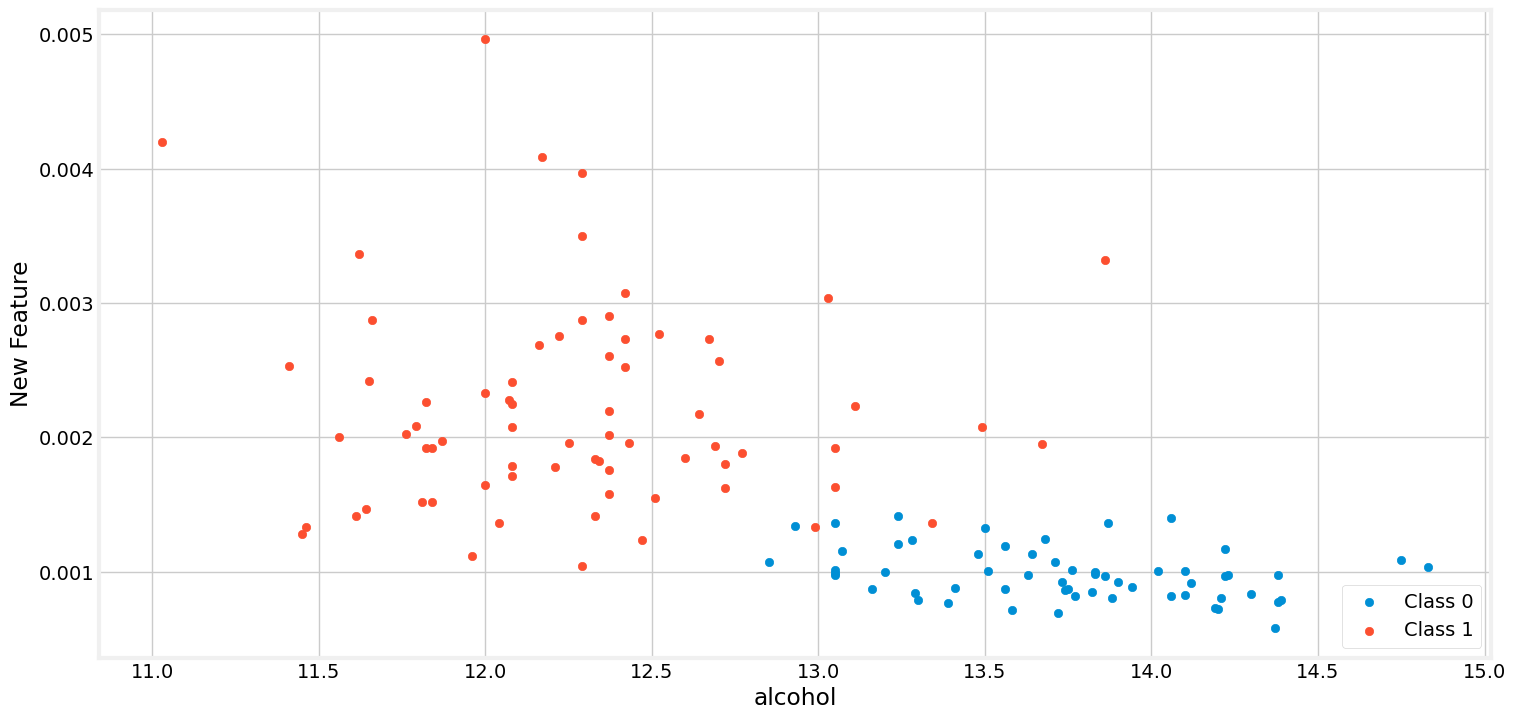

In [54]:
dataset['new_var'] = dataset['hue'] / dataset['proline']

plt.scatter(dataset.loc[dataset['target'] == 0, 'alcohol'], dataset.loc[dataset['target'] == 0,'new_var'], label='Class 0')
plt.scatter(dataset.loc[dataset['target'] == 1,'alcohol'], dataset.loc[dataset['target'] == 1,'new_var'], label='Class 1')

plt.ylabel("New Feature")
plt.xlabel("alcohol")
plt.legend(loc="lower right")

This new feature allows us to find a particular good characteristic, that when combined with the *alcohol* feature allows for an almost complete separation between the two classes.

(np.float64(-0.5), np.float64(1985.5), np.float64(1112.5), np.float64(-0.5))

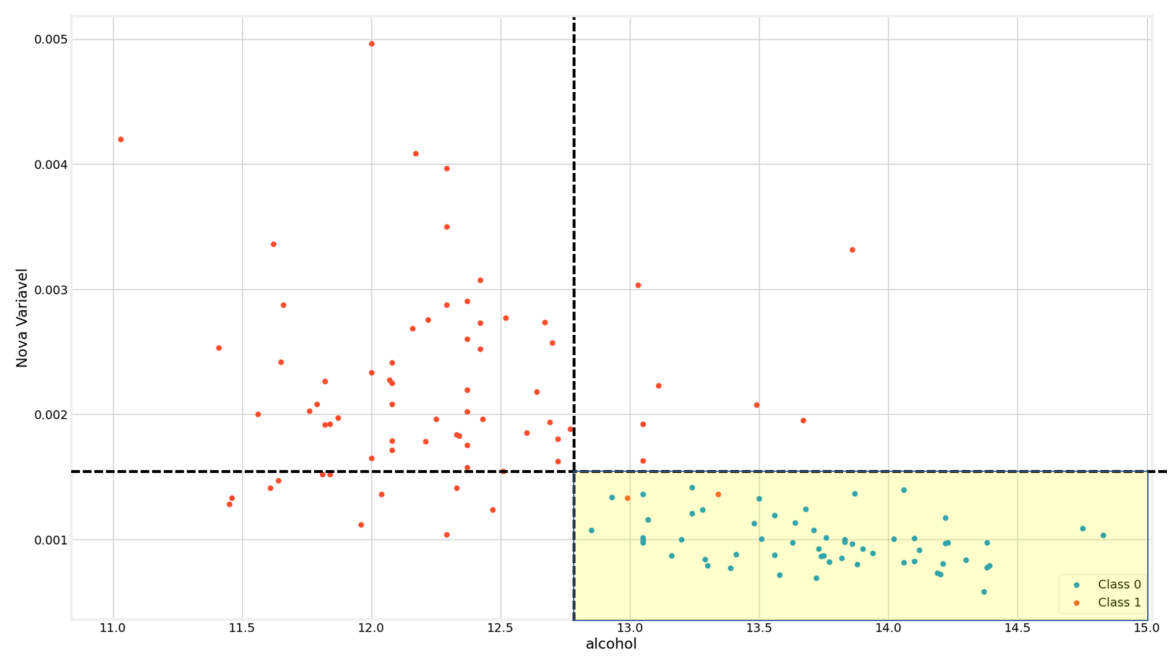

In [55]:
# Don't run
img = plt.imread('new_var.png')
plt.imshow(img)
plt.axis('off')

We now would like to challenge you to explore different combinations and explore the dataset. You can use feature engineering as well as data visualization to explore and hypothesize the best approach to distinguish between the two classes.

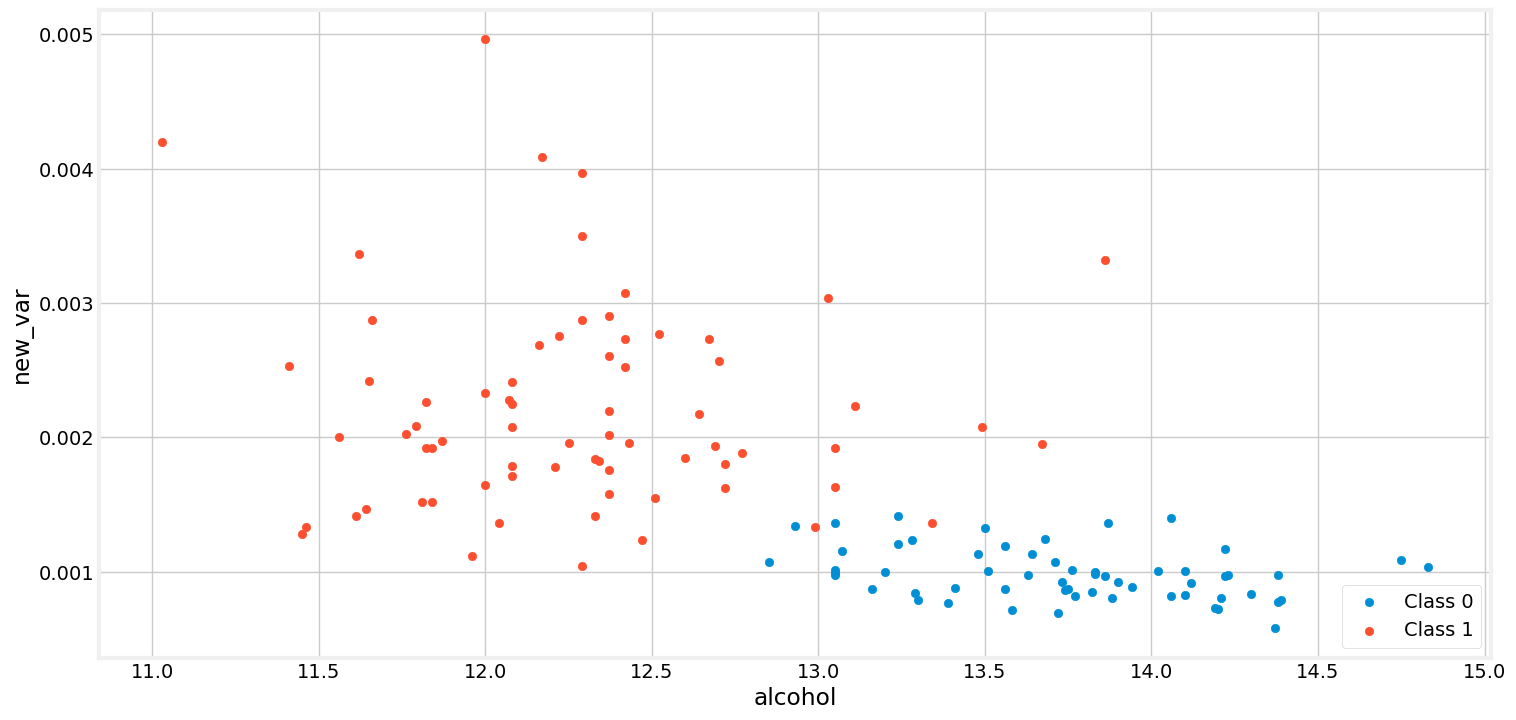

In [57]:
# Use this code snipit to explore the dataset
fe_feature_1 = "hue"
fe_feature_2 = "proline"

dataset['new_var'] = dataset[fe_feature_1] / dataset[fe_feature_2]

plot_x_feature = "alcohol"
plot_y_feature = "new_var"

plt.scatter(dataset.loc[dataset['target'] == 0, plot_x_feature], dataset.loc[dataset['target'] == 0, plot_y_feature], label='Class 0')
plt.scatter(dataset.loc[dataset['target'] == 1,plot_x_feature], dataset.loc[dataset['target'] == 1, plot_y_feature], label='Class 1')

plt.xlabel(plot_x_feature)
plt.ylabel(plot_y_feature)
plt.legend(loc="lower right")

## Modeling

Now that our data is cleaned and properly transformed, we can move on to the **modeling stage** of the data science workflow.

This is where we use **machine learning algorithms** or **statistical models** to learn patterns from the data and make predictions.

In our case, the goal is to build a simple **classifier** that predicts the **wine producer** based on some combination of the 13 chemical features of each wine.


You might want to start with a simple and interpretable model first.
In this example we will implement a simple decision tree using the previous rule that we found using the ***alcohol***, and the ration between ***hue*** and ***proline***.


In [59]:
dataset['new_var'] = dataset['hue'] / dataset['proline'] # Just to ensure that the new var is set to the desired ratio
small_dataset = dataset.loc[:, ['alcohol', 'new_var', 'target']]
small_dataset

,alcohol,new_var,target
0,14.23,0.000977,0
1,13.20,0.001000,0
2,13.16,0.000869,0
3,14.37,0.000581,0
4,13.24,0.001415,0
...,...,...,...
125,12.07,0.002275,1
126,12.43,0.001960,1
127,11.79,0.002082,1
128,12.37,0.002602,1


Let's start by calculating the mean value for the ***alcohol*** and ***new_var*** features.

In [60]:
alcohol_mean = small_dataset['alcohol'].to_numpy().mean()
alcohol_mean

np.float64(12.944076923076922)

In [61]:
new_var_mean = small_dataset['new_var'].to_numpy().mean()
new_var_mean

np.float64(0.0016470753137354886)

We can then use these values to create a simple decision tree model that will assign each wine to one of the two target classes based on a simple rule.

As for which rule the model will apply, we saw that a higher than the mean **alcohol** value and a a lower than the mean value for the **new_var** will incorporate the majority of the class 0 cases. So, our model can be defined as the following:

In [65]:
def simple_decision_tree(feature_1, feature_2, limit_feature_1, limit_feature_2):
  if feature_1 > limit_feature_1 and feature_2 < limit_feature_2:
    return 0
  return 1


## Model Validation

Now let's test our model and evaluate its efficiency.

In [67]:
predictions = []
data, targets = small_dataset.to_numpy()[:, :-1], small_dataset.to_numpy()[:, -1]
number_of_samples, _ = data.shape

for i in range(number_of_samples):
  x_1, x_2 = data[i, :]
  prediction = simple_decision_tree(x_1, x_2, alcohol_mean, new_var_mean)
  predictions.append(prediction)


We will use accuracy to determine how good our model is:



In [68]:
accurate_predictions = sum(predictions == targets)
accuracy = round(accurate_predictions / number_of_samples * 100, 2)
accuracy

np.float64(96.15)

## **Challenge**

Using all you learnt here, try and improve the model's performance. Feel free to add more complex rules if you want.